Using the KNN to determine the class of a new point

It caclulates the distance form every point, then takes the points that are the nearest to our point and gets the class that most points from the nearest points have

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
points = { 'blue':[[2,4], [1,3], [2,3],[3,2], [2,1]],
            'red':[[5,6], [4,5], [4,6], [6,6], [5,4]] }

new_point = [5,5]

In [3]:
# Distnace function
def euclidean_distance(p, q):
    return np.sqrt( np.sum( (np.array(p) - np.array(q)) **2 ) )

In [7]:
# create the class

class KNearestNeighbors:
    
    def __init__(self, k = 3):
        self.k = k
        self.points = None
        
    def fit(self, points):
        self.points = points
        
    def predict(self, new_point):
        distances = []
        
        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])
                
        categories = [category[1] for category in sorted(distances)[:self.k]]
        
        # create a dictionary that counts the number of each category in categories list
        category_counts = {}
        for category in categories:
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1
        
        
        # Finding the most common category
        max_count = 0
        most_common_category = None
        for category, count in category_counts.items():
            if count > max_count:
                max_count = count
                most_common_category = category
                
        return most_common_category
        

In [8]:
# Get the prediciton
clf = KNearestNeighbors()
clf.fit(points)
print(clf.predict(new_point))

red


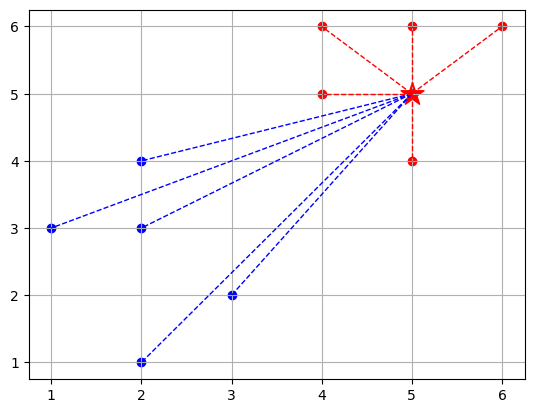

In [10]:
#Visualize our results

plt.plot()
plt.grid()



for point in points['blue']:
    plt.scatter(point[0], point[1], color = 'blue')
for point in points['red']:
    plt.scatter(point[0], point[1], color = 'red')
    
new_class = clf.predict(new_point)
color = 'red' if new_class == 'red' else 'blue'

plt.scatter(new_point[0], new_point[1], color = color, marker = '*', s= 300)

for point in points['blue']:
    plt.plot([new_point[0], point[0]], [new_point[1], point[1]], color = 'blue', linestyle = '--', linewidth=1)
for point in points['red']:
    plt.plot([new_point[0], point[0]], [new_point[1], point[1]], color = 'red',linestyle = '--', linewidth=1)

# 3 Dimensions

In [18]:
points = { 'blue':[[2,4,3], [1,3,5], [2,3,1],[3,2,3], [2,1,6]],
            'red':[[5,6,5], [4,5,2], [4,6,1], [6,6,1], [5,4,6], [10,10,4]] }

new_point = [3,3,4]

In [19]:
clf = KNearestNeighbors()
clf.fit(points)
print(clf.predict(new_point))

blue


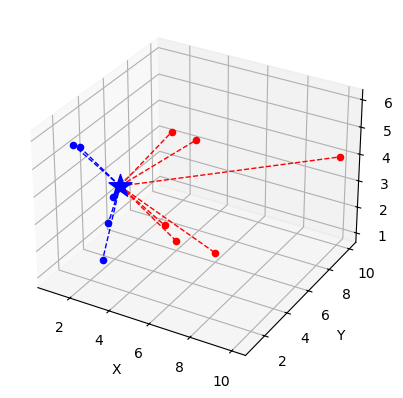

In [23]:
# Visualize our results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)

# Scatter plot existing points
for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='blue')
for point in points['red']:
    ax.scatter(point[0], point[1], point[2], color='red')

# Scatter plot new point
new_class = clf.predict(new_point)
color = 'red' if new_class == 'red' else 'blue'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=300)

# Connect new point with existing points
for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='blue', linestyle='--', linewidth=1)
for point in points['red']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='red', linestyle='--', linewidth=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
